In [ ]:
#default_exp validation_visuals

## To Do:
> 1. Rather than applying single-volume models to that volume, I think that what makes the most sense here will be to use the best-performing "everything" model based on your earlier benchmarking and then apply that to different transcriptions.
2. Given the structure of the code I'm not immediately sure how hasWrongEthAssgnt_cler (e.g.) can be so high with isEnslaved low, so it's entirely possible that I am missing something. --> This should not have been happening, still not sure why
    - My [Daniel's] theory is that there's just some unintended interaction based on the current code structure that is inflating hasWrongEthAssgnt_cler, though, and I think that it'll be eliminated by popping that whole block of code back out and into a separate iteration through entry_people.
3. Check problem with hasWrongEths for Cleric
4. Uncoupled parents is probably incorrect

In [ ]:
#export
#dependencies

#nlp packages
import spacy
from spacy.util import minibatch, compounding

#manipulation of tables/arrays
import pandas as pd
import numpy as np
import copy
import json

import difflib
import matplotlib.pyplot as plt
import matplotlib as mpl

#internal imports
from ssda_nlp.collate import *
from ssda_nlp.split_data import *
from ssda_nlp.modeling import *
from ssda_nlp.model_performance_utils import *
from ssda_nlp.xml_parser import *
from ssda_nlp.unstructured2markup import *
from ssda_nlp.utility import *
from ssda_nlp.relationships import *
from ssda_nlp.full_volume import *

In [ ]:
#no_test

COLOR = 'grey'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

In [ ]:
#no_test

def val_vis_bar(validation_list):
    #Set up the figure
    plt.figure(figsize=(15,10))
    title_font = 30
    label_font = 22
    tick_font = 15
    colors_array = ['g']*9 + ['b']*5 + ['r']*8
    
    #Set up the variables
    val1 = validation_list[0]
    objects = val1.keys()
    y_pos = np.arange(len(objects))
    performance = [0]*y_pos
    
    #Gather each validation dictionary from each entry into a summed var
    for i in range(len(validation_list)):
        entry = validation_list[i]
        vals = list(entry.values())

        performance = [sum(x) for x in zip(performance, vals)]

    #Plot the final results
    plt.bar(y_pos, performance, align='center', alpha=0.5, color=colors_array)
    plt.xticks(ticks=y_pos, labels=objects, rotation=75, fontsize=tick_font)
    plt.xlabel('Checks', fontsize=label_font)
    plt.ylabel('Total Number of Validation Flags', fontsize=label_font)
    plt.title('Full Volume Validation Checks', fontsize=title_font)

    plt.show()

239746


C:\Users\14193\anaconda3\lib\site-packages\spacy\util.py:730: UserWarning: [W095] Model 'es_core_news_md' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.1.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Loaded model 'models/239746'
Entities extracted.
Printing principal status:
Esclava
---------------------
Enslaver found, but thinks principal is not enslaved...
{'id': 'St. Augustine-1069-2-P1;St. Augustine-1069-2-P3', 'name': 'Yuana Maria Francisca Saunders', 'origin': None, 'ethnicities': None, 'age': 'Adulta', 'legitimacy': 'Hija natural', 'occupation': None, 'phenotype': None, 'status': None, 'titles': None, 'ranks': None, 'relationships': [{'related_person': 'St. Augustine-1069-2-P7', 'relationship_type': 'godparent'}, {'related_person': 'St. Augustine-1069-2-P3', 'relationship_type': 'parent'}, {'related_person': 'St. Augustine-1069-2-P4', 'relationship_type': 'parent'}, {'related_person': 'St. Augustine-1069-2-P1', 'relationship_type': 'child'}, {'related_person': 'St. Augustine-1069-2-P5', 'relationship_type': 'enslaver'}]}
-------------------------
Printing principal status:
Esclavos
---------------------
Printing principal status:
Esclava
---------------------
Printing princ

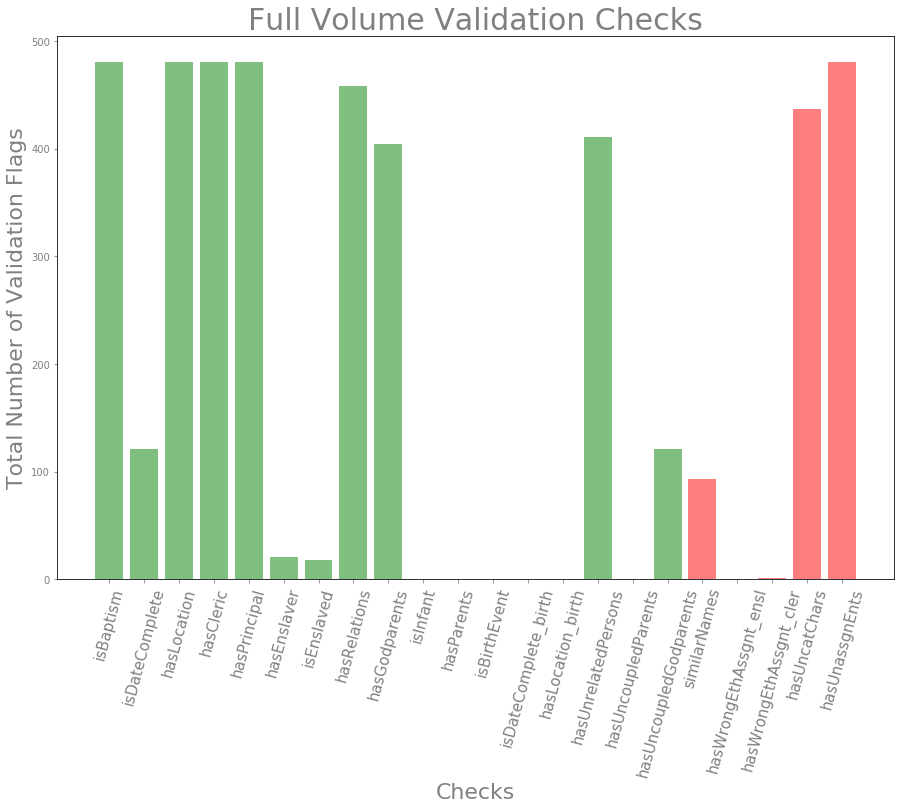

166470


C:\Users\14193\anaconda3\lib\site-packages\spacy\util.py:730: UserWarning: [W095] Model 'en_pipeline' (0.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.1.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Loaded model 'models/166470'
Entities extracted.
Enslaver found, but thinks principal is not enslaved...
{'id': '166470-1002-1-P1;166470-1002-1-P4', 'name': 'Roque Cruz', 'origin': 'Guinea', 'ethnicities': None, 'age': 'adulto', 'legitimacy': None, 'occupation': None, 'phenotype': None, 'status': None, 'titles': None, 'ranks': None, 'relationships': [{'related_person': '166470-1002-1-P5', 'relationship_type': 'godparent'}, {'related_person': '166470-1002-1-P6', 'relationship_type': 'godparent'}, {'related_person': '166470-1002-1-P3', 'relationship_type': 'enslaver'}]}
-------------------------
Enslaver found, but thinks principal is not enslaved...
{'id': '166470-1002-2-P1;166470-1002-2-P4', 'name': 'Maria Filomenia', 'origin': 'Guinea', 'ethnicities': None, 'age': 'adulta', 'legitimacy': None, 'occupation': None, 'phenotype': None, 'status': None, 'titles': None, 'ranks': None, 'relationships': [{'related_person': '166470-1002-2-P5', 'relationship_type': 'godparent'}, {'related_person

Enslaver found, but thinks principal is not enslaved...
{'id': '166470-1008-5-P1', 'name': 'Maria del Carmen Corras', 'origin': None, 'ethnicities': None, 'age': 'parvula', 'legitimacy': 'hija legitima', 'occupation': None, 'phenotype': None, 'status': None, 'titles': None, 'ranks': None, 'relationships': [{'related_person': '166470-1008-5-P7', 'relationship_type': 'godparent'}, {'related_person': '166470-1008-5-P5', 'relationship_type': 'enslaver'}]}
-------------------------
Enslaver found, but thinks principal is not enslaved...
{'id': '166470-1009-3-P1;166470-1009-3-P4', 'name': 'Rosendo', 'origin': 'Guinea', 'ethnicities': None, 'age': 'adulto', 'legitimacy': None, 'occupation': None, 'phenotype': None, 'status': None, 'titles': None, 'ranks': None, 'relationships': [{'related_person': '166470-1009-3-P5', 'relationship_type': 'godparent'}, {'related_person': '166470-1009-3-P6', 'relationship_type': 'godparent'}, {'related_person': '166470-1009-3-P3', 'relationship_type': 'enslaver

Enslaver found, but thinks principal is not enslaved...
{'id': '166470-1014-6-P1', 'name': 'Sebera Sanchez', 'origin': None, 'ethnicities': None, 'age': 'parvula', 'legitimacy': None, 'occupation': None, 'phenotype': None, 'status': None, 'titles': None, 'ranks': None, 'relationships': [{'related_person': '166470-1014-6-P5', 'relationship_type': 'godparent'}, {'related_person': '166470-1014-6-P4', 'relationship_type': 'enslaver'}]}
-------------------------
Enslaver found, but thinks principal is not enslaved...
{'id': '166470-1015-2-P5', 'name': 'Unknown principal', 'origin': 'Guinea', 'ethnicities': None, 'age': 'adulto', 'legitimacy': None, 'occupation': None, 'phenotype': None, 'status': None, 'titles': None, 'ranks': None, 'relationships': [{'related_person': '166470-1015-2-P3', 'relationship_type': 'godparent'}, {'related_person': '166470-1015-2-P2', 'relationship_type': 'enslaver'}]}
-------------------------
Enslaver found, but thinks principal is not enslaved...
{'id': '166470

Enslaver found, but thinks principal is not enslaved...
{'id': '166470-1024-1-P1;166470-1024-1-P5', 'name': 'Pantaleón Santa Cruz', 'origin': None, 'ethnicities': None, 'age': 'adulto', 'legitimacy': None, 'occupation': None, 'phenotype': None, 'status': None, 'titles': None, 'ranks': None, 'relationships': [{'related_person': '166470-1024-1-P6', 'relationship_type': 'godparent'}, {'related_person': '166470-1024-1-P7', 'relationship_type': 'godparent'}, {'related_person': '166470-1024-1-P4', 'relationship_type': 'enslaver'}]}
-------------------------
Enslaver found, but thinks principal is not enslaved...
{'id': '166470-1024-3-P1;166470-1024-3-P4', 'name': 'Manuel Santa Cruz', 'origin': None, 'ethnicities': None, 'age': 'adulto', 'legitimacy': None, 'occupation': None, 'phenotype': None, 'status': None, 'titles': None, 'ranks': None, 'relationships': [{'related_person': '166470-1024-3-P5', 'relationship_type': 'godparent'}, {'related_person': '166470-1024-3-P6', 'relationship_type': '

Enslaver found, but thinks principal is not enslaved...
{'id': '166470-1028-6-P1;166470-1028-6-P5', 'name': 'Pedro', 'origin': None, 'ethnicities': None, 'age': 'adulto', 'legitimacy': None, 'occupation': None, 'phenotype': None, 'status': None, 'titles': None, 'ranks': None, 'relationships': [{'related_person': '166470-1028-6-P6', 'relationship_type': 'godparent'}, {'related_person': '166470-1028-6-P4', 'relationship_type': 'enslaver'}]}
-------------------------
Enslaver found, but thinks principal is not enslaved...
{'id': '166470-1028-7-P1', 'name': 'Antonio Sampain', 'origin': None, 'ethnicities': None, 'age': 'adulto', 'legitimacy': None, 'occupation': None, 'phenotype': None, 'status': None, 'titles': None, 'ranks': None, 'relationships': [{'related_person': '166470-1028-7-P6', 'relationship_type': 'godparent'}, {'related_person': '166470-1028-7-P4', 'relationship_type': 'enslaver'}]}
-------------------------
Enslaver found, but thinks principal is not enslaved...
{'id': '16647

People records enhanced and disambiguated.
Single ID generated for each individual.
JSON built, processing completed.
--------------------------------------


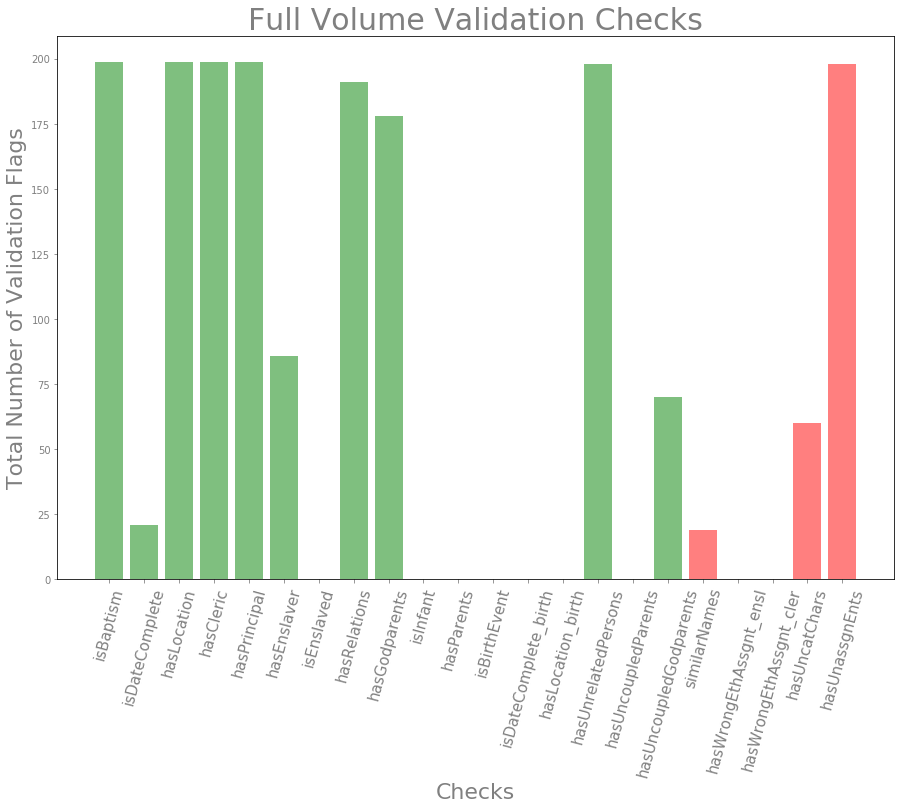

15834
Loaded model 'models/15834'
Entities extracted.
Printing principal status:
Esc.va;esclava
---------------------
Printing principal status:
Esc.a
---------------------
Printing principal status:
Esc.a
---------------------
Printing principal status:
Esc.vo;esc.o
---------------------
Printing principal status:
Esc.vo;esc.o
---------------------
Printing principal status:
Esc.vo;esc.o
---------------------
Printing principal status:
Esc.va
---------------------
Enslaver found, but thinks principal is not enslaved...
{'id': '15834-1034-3-P1;15834-1034-3-P3', 'name': 'Antonia', 'origin': None, 'ethnicities': 'mina', 'age': 'adulta', 'legitimacy': None, 'occupation': None, 'phenotype': 'negra', 'status': 'Esc.va', 'titles': None, 'ranks': None, 'relationships': [{'related_person': '15834-1034-3-P5', 'relationship_type': 'godparent'}, {'related_person': '15834-1034-3-P4', 'relationship_type': 'enslaver'}]}
-------------------------
Printing principal status:
esc.va
--------------------

Enslaver found, but thinks principal is not enslaved...
{'id': '15834-1155-3-P1;15834-1155-3-P5', 'name': 'Juo Antonio', 'origin': None, 'ethnicities': None, 'age': 'niño', 'legitimacy': None, 'occupation': None, 'phenotype': None, 'status': None, 'titles': None, 'ranks': None, 'relationships': [{'related_person': '15834-1155-3-P6', 'relationship_type': 'godparent'}, {'related_person': '15834-1155-3-P7', 'relationship_type': 'enslaver'}]}
-------------------------
Printing principal status:
escl
---------------------
Printing principal status:
escl.s
---------------------
Printing principal status:
esclavos
---------------------
Printing principal status:
esclavos
---------------------
Printing principal status:
esclavos
---------------------
Printing principal status:
esclava
---------------------
Printing principal status:
escl
---------------------
Printing principal status:
esclabos
---------------------
Printing principal status:
esclava
---------------------
Printing principal st

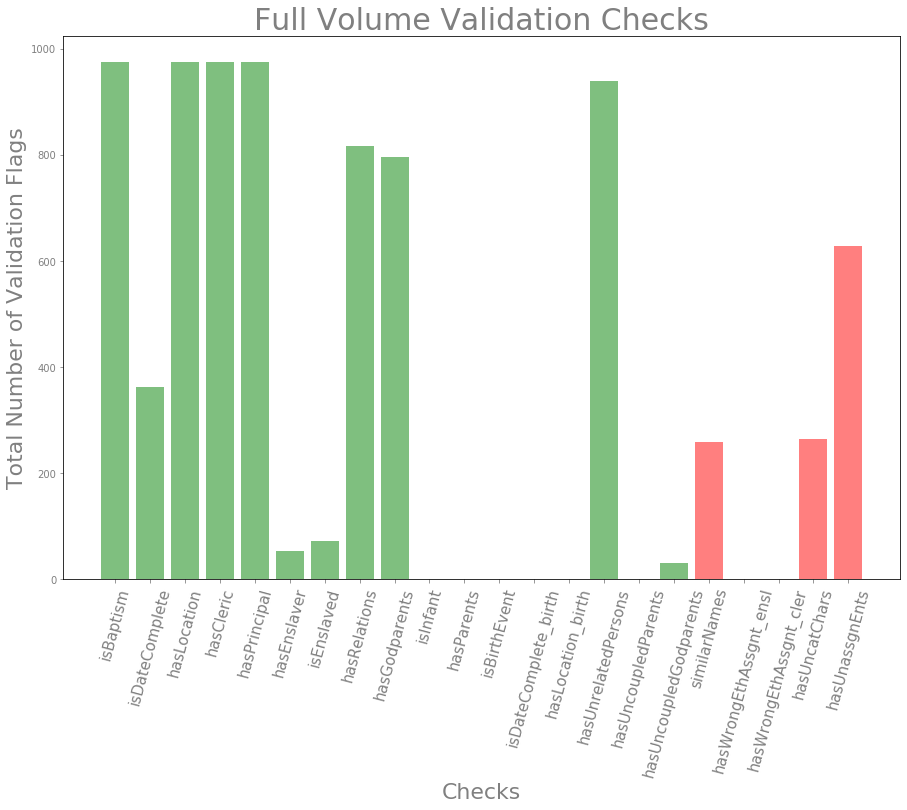

In [ ]:
#no_test

models_list = ["15834", "166470", "239746"] #"exhaustive_models", "mat_baut_1", "port01", "st_aug_bapt_2"]
models_list.reverse()
#row names: people, places, events, json_path, entities, noCategory, validation_list
num_rows = 7
num_models = len(models_list)
cols = np.zeros((num_rows,num_models))

for idx, modelTemp in enumerate(models_list):
    #"transcriptions\\15834.xml", "models/15834"
    print(modelTemp)
    my_trans = "transcriptions\\" + str(modelTemp) + ".xml"
    my_dir = "models/" + str(modelTemp)
    people, places, events, json_path, entities, noCategory, validation_list = process_volume(my_trans, my_dir)
    print("--------------------------------------")
    val_vis_bar(validation_list)

In [ ]:
#no_test

from nbdev.export import notebook2script
notebook2script()

Converted 12-ssda-xml-parser.ipynb.
Converted 31-collate-xml-entities-spans.ipynb.
Converted 33-split-data.ipynb.
Converted 41-generic-framework-for-spacy-training.ipynb.
Converted 42-initial-model.ipynb.
Converted 51-data-preprocessing.ipynb.
Converted 52-unstructured-to-markup.ipynb.
Converted 53-markup-to-spatial-historian.ipynb.
Converted 54-utility-functions.ipynb.
Converted 61-prodigy-output-training-demo.ipynb.
Converted 62-full-model-application-demo.ipynb.
Converted 63-pt-model-training.ipynb.
Converted 64-es-model-training.ipynb.
Converted 65-all-annotations-model-training.ipynb.
Converted 66-es-guatemala-model-training.ipynb.
Converted 67-death-and-birth-records-together.ipynb.
Converted 70-exhaustive-training.ipynb.
Converted 71-relationship-builder.ipynb.
Converted 72-full-volume-processor.ipynb.
Converted 73-table-output.ipynb.
Converted 74-validation-visuals.ipynb.
